In [1]:
#import numpy and sep
import numpy as np
import sep

In [2]:
#additional setup for reading the test image and displaying plots
import astropy.io
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [3]:
#define data
data = fits.getdata("hubble.fits")

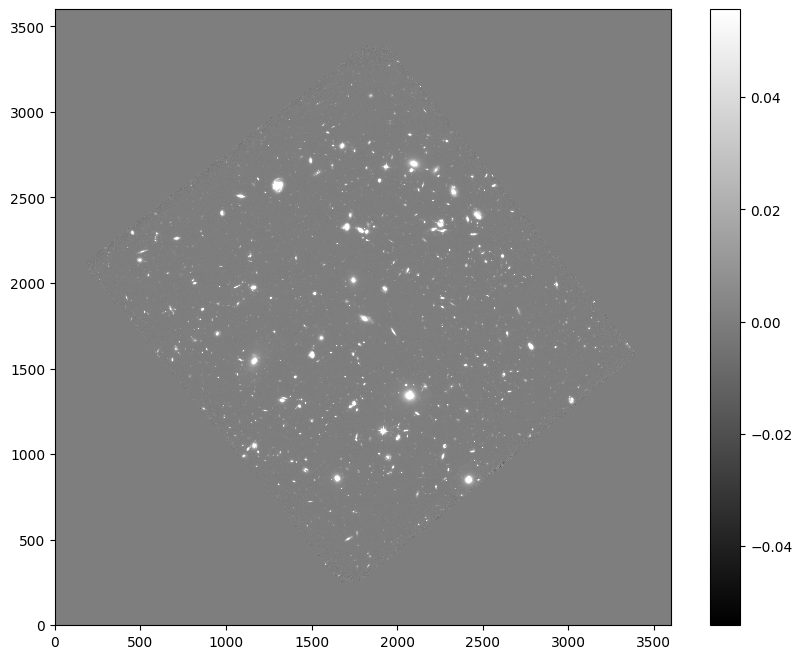

In [4]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('hubbledata.png')

In [5]:
data = data.byteswap().newbyteorder()
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [6]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [7]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

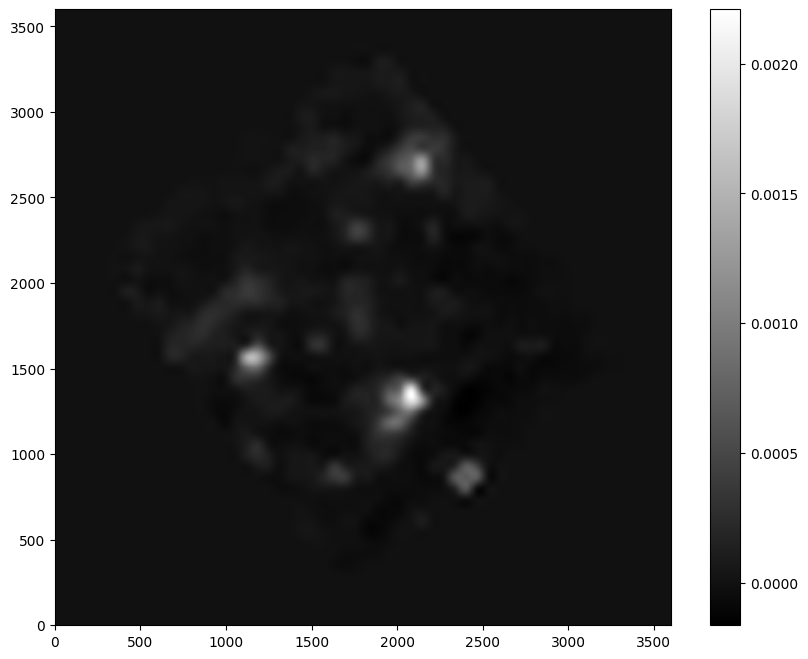

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('2darray2.png')

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

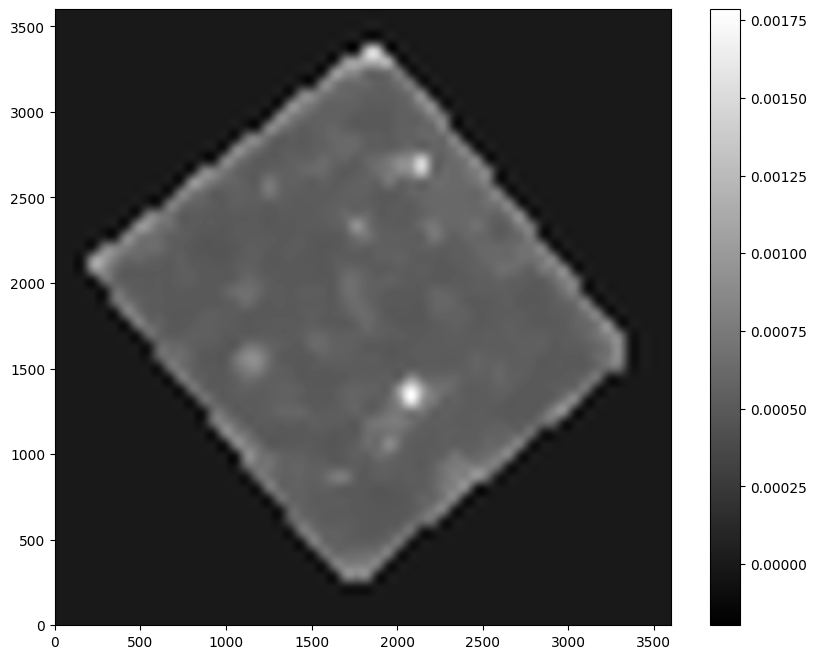

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('bkgnoise2.png')

In [11]:
# subtract the background
#data_sub = data - bkg

In [12]:
#define objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

NameError: name 'data_sub' is not defined

In [13]:
# how many objects were detected
len(objects)

NameError: name 'objects' is not defined

NameError: name 'data_sub' is not defined

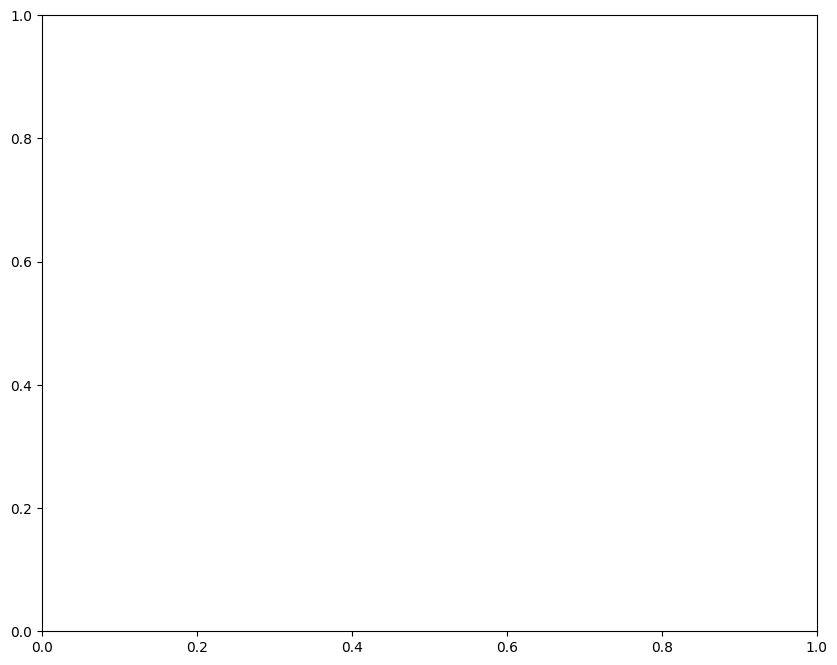

In [14]:
#import Ellipse
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('mistyrose')
    ax.add_artist(e)
plt.savefig('ellipse2.png')

In [15]:
#open file
with fits.open('hubble.fits') as hdul:
    image_data = hdul[0].data

#set threshold
threshold = 3500
sources = np.where(image_data > threshold)
print(sources)

bkg = np.median(image_data)
bkg_std = np.std(image_data)
    
threshold = bkg + 3 * bkg_std

#define source_pixels
source_pixels = np.where(image_data > threshold)

#define source_flux
source_flux = image_data[source_pixels]

#print number of sources
num_sources = len(source_flux)
print(f"Number of sources: {num_sources}")

#print source fluxes
for i in range(len(source_flux)):
    print(f"Source at pixel {source_pixels[0][i], source_pixels[1][i]}: Flux = {source_flux[i]}")

(array([], dtype=int64), array([], dtype=int64))
Number of sources: 5886
Source at pixel (660, 1741): Flux = 0.24903298914432526
Source at pixel (660, 1742): Flux = 0.23656980693340302
Source at pixel (661, 1740): Flux = 0.2950945794582367
Source at pixel (661, 1741): Flux = 0.49908122420310974
Source at pixel (661, 1742): Flux = 0.4894463121891022
Source at pixel (661, 1743): Flux = 0.2739545702934265
Source at pixel (662, 1739): Flux = 0.17097201943397522
Source at pixel (662, 1740): Flux = 0.41184765100479126
Source at pixel (662, 1741): Flux = 0.7412772178649902
Source at pixel (662, 1742): Flux = 0.685973048210144
Source at pixel (662, 1743): Flux = 0.3727867305278778
Source at pixel (662, 1744): Flux = 0.18330486118793488
Source at pixel (663, 1740): Flux = 0.3512020409107208
Source at pixel (663, 1741): Flux = 0.5824828743934631
Source at pixel (663, 1742): Flux = 0.529322624206543
Source at pixel (663, 1743): Flux = 0.2885502874851227
Source at pixel (664, 1740): Flux = 0.16932

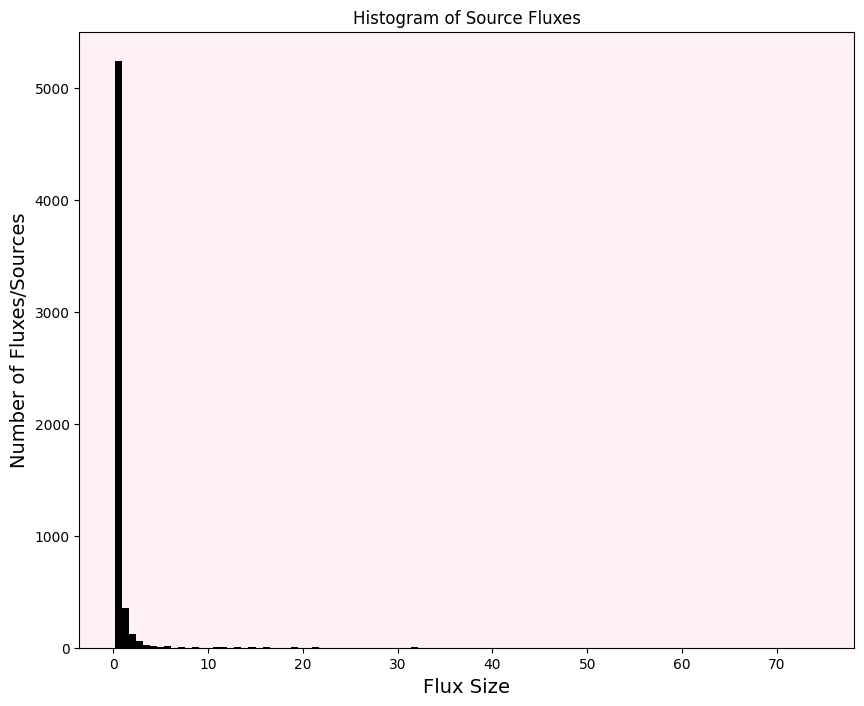

In [16]:
#histogram source flux
plt.hist(source_flux, bins=100, color='black')
plt.gca().set_facecolor('lavenderblush')
plt.xlabel('Flux Size', fontsize=14)
plt.ylabel('Number of Fluxes/Sources', fontsize=14)
plt.title('Histogram of Source Fluxes')
plt.savefig('hist_sourceflux')

In [17]:
#print mean, median, and standard deviation values
mean = np.mean(source_flux)
median = np.median(source_flux)
std_dev = np.std(source_flux)

print(f"the mean value: {mean}")
print(f"the median value: {median}")
print(f"the standard deviation: {std_dev}")

the mean value: 0.6373835802078247
the median value: 0.271668016910553
the standard deviation: 2.4851009845733643


In [18]:
#print the largest source flux
largest_outlier = np.max(image_data)
print(f"largest source flux: {largest_outlier}")

largest source flux: 74.44647979736328


In [19]:
#print the position of the largest source flux and the standard deviation from the mean
position = np.unravel_index(np.argmax(image_data), image_data.shape)
std_devs_from_mean = (largest_outlier - mean) / std_dev

print(f"position of the largest outlier: {position}")
print(f"standard deviation from mean: {std_devs_from_mean}")

position of the largest outlier: (1135, 1914)
standard deviation from mean: 29.70064353942871


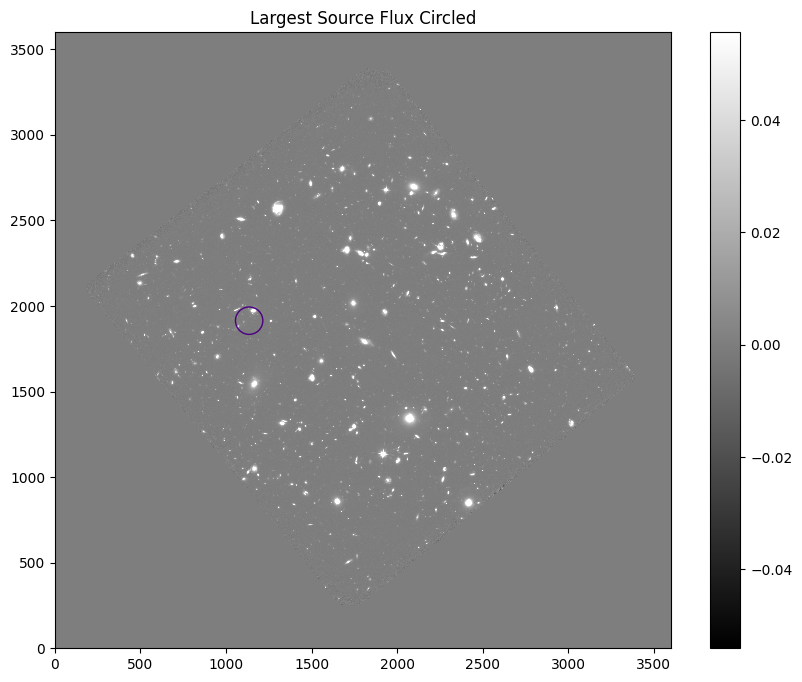

In [20]:
#import circle
from matplotlib.patches import Circle

#circle position of largest source flux on image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

largest_x, largest_y = 1135, 1914
circle_radius = 80

circle = Circle((largest_x, largest_y), circle_radius, color='indigo', fill=False, linewidth=1)

ax = plt.gca()
ax.add_patch(circle)

plt.title('Largest Source Flux Circled')

plt.savefig('hubbledata_circle.png')

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [22]:
#define data
data105 = fits.getdata('hubble.fits')
data125 = fits.getdata('hubble125.fits')
data160 = fits.getdata('hubble160.fits')

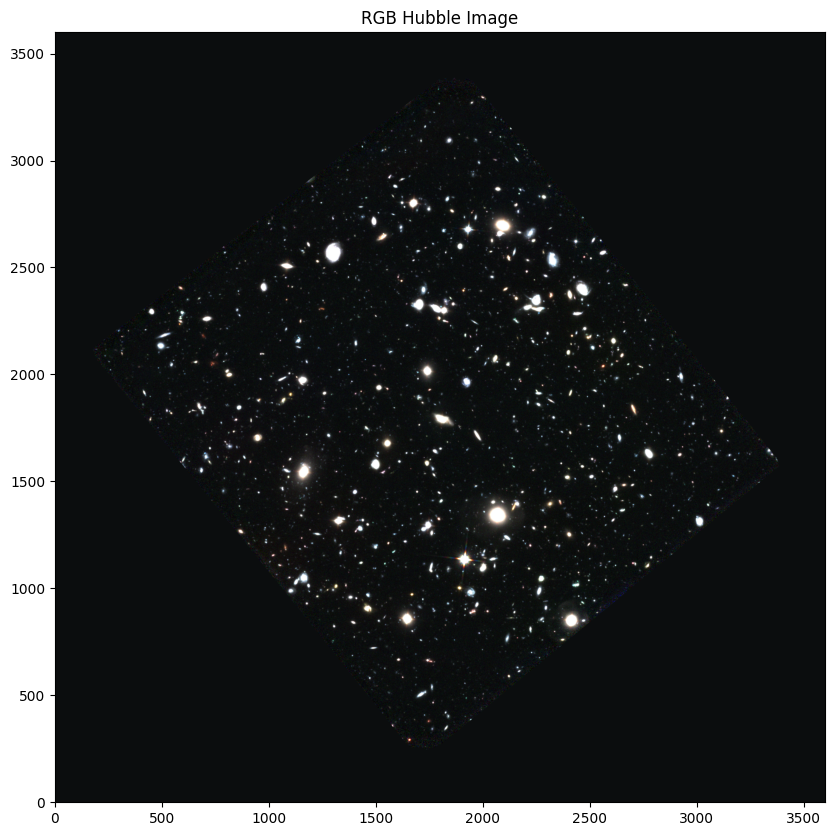

<Figure size 1000x800 with 0 Axes>

In [23]:
# Normalize the data using a percentile range
def normalize(data, vmin_percentile=0.5, vmax_percentile=99.5):
    # Compute the specified percentiles
    vmin = np.percentile(data, vmin_percentile)
    vmax = np.percentile(data, vmax_percentile)
    # Clip and scale the data
    data_clipped = np.clip(data, vmin, vmax)
    return (data_clipped - vmin) / (vmax - vmin)

red_channel = normalize(data160) # f160w = red
green_channel = normalize(data125) # f125w = green
blue_channel = normalize(data105) # f105w = blue

#show rgb image
rgb_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.title('RGB Hubble Image')
plt.show()
plt.savefig('RGBhubble.png')